### Code to Utilized GPU for Training

In [1]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=4096),
         tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [3]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


### Test GPU Speed

In [5]:
from numba import jit, cuda
import numpy as np
# to measure exec time
from timeit import default_timer as timer

# normal function to run on cpu
def func(a):        
 for i in range(10000000):
  a[i]+= 1 

# function optimized to run on gpu
@jit(target_backend='cuda')      
def func2(a):
 for i in range(10000000):
  a[i]+= 1
if __name__=="__main__":
 n = 10000000       
 a = np.ones(n, dtype = np.float64)
 
 start = timer()
 func(a)
 print("without GPU:", timer()-start) 
 
 start = timer()
 func2(a)
 print("with GPU:", timer()-start)


without GPU: 4.650627400000001
with GPU: 0.509314100000001


### Visualize Data

In [6]:
cd C:\Users\Mark Vincent\Desktop\final resnet101

C:\Users\Mark Vincent\Desktop\final resnet101


#Visualize Dataset


---



---



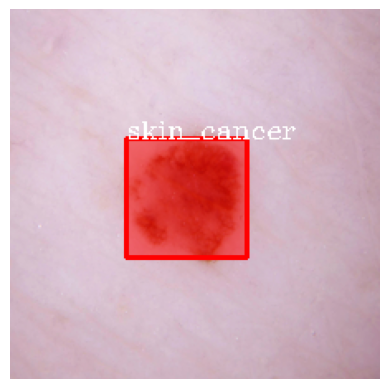

In [7]:
import pixellib
from pixellib.custom_train import instance_custom_training

vis_img = instance_custom_training()
vis_img.load_dataset("C:\\Users\Mark Vincent\Desktop/final resnet101/skin")
vis_img.visualize_sample()

#Train a custom model using your dataset


---



---



Using Resnet101
Training Mask-RCNN consumes a lot of memory. On google colab using resnet101 as network backbone, you will be able to train with a batchsize of 4. The default network backbone is resnet101. Resnet101 is used as a default backbone because it appears to reach a lower validation loss during training faster than resnet50. It also works better for a dataset with multiple classes and much more images.

### Train Data ( Using Resnet101 )

In [8]:
cd C:\Users\Mark Vincent\Desktop\final resnet101

C:\Users\Mark Vincent\Desktop\final resnet101


In [9]:
import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()


train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 2, batch_size = 1)
train_maskrcnn.load_pretrained_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_coco.h5")
train_maskrcnn.load_dataset("C:\\Users\Mark Vincent\Desktop/final resnet101/skin")
train_maskrcnn.train_model(num_epochs =50,augmentation=True ,path_trained_models = "mask_rcnn_models"   )



Using resnet101 as network backbone For Mask R-CNN model
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

Train 480 images
Validate 120 images
Applying augmentation on dataset
Checkpoint Path: C:\Users\Mark Vincent\Desktop\final resnet101\mask_rcnn_models
Selecting layers to train
Epoch 1/50


C:\Users\Mark Vincent\anaconda3\envs\cognate37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 1.0000 - loss: 2.0380 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.8905 - mrcnn_class_loss: 0.1108 - mrcnn_bbox_loss: 0.6296 - mrcnn_mask_loss: 0.3799WARNING:tensorflow:From C:\Users\Mark Vincent\anaconda3\envs\cognate37\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
100/100 [==============================] - 201s 2s/step - batch: 49.5000 - size: 1.0000 - loss: 2.0380 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.8905 - mrcnn_class_loss: 0.1108 - mrcnn_bbox_loss: 0.6296 - mrcnn_mask_loss: 0.3799 - val_loss: 1.1699 - val_rpn_class_loss: 0.0178 - val_rpn_bbox_loss: 0.4302 - val_mrcnn_class_loss: 0.0521 - val_mrcnn_bbox_loss: 0.4246 - val_mrcnn_mask_loss: 0.24

#Model Evaluation


---



---



### Evalution of Model

In [10]:
import pixellib
from pixellib.custom_train import instance_custom_training


train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 2)
train_maskrcnn.load_dataset("C:\\Users\Mark Vincent\Desktop/final resnet101/skin")
train_maskrcnn.evaluate_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models")

Using resnet101 as network backbone For Mask R-CNN model
Instructions for updating:
Use fn_output_signature instead
C:\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.001-1.169911.h5 evaluation using iou_threshold 0.5 is 0.589583 

C:\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.002-1.088879.h5 evaluation using iou_threshold 0.5 is 0.337500 

C:\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.003-0.787637.h5 evaluation using iou_threshold 0.5 is 0.095833 

C:\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.004-0.755418.h5 evaluation using iou_threshold 0.5 is 0.469444 

C:\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.005-0.651495.h5 evaluation using iou_threshold 0.5 is 0.666667 

C:\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.006-0.822474.h5 evaluation using iou_threshold 0.5 is 0.058333 

C:\Users\Mark Vincen

### Retrain (50)

In [5]:
cd C:\Users\Mark Vincent\Desktop\final resnet101

C:\Users\Mark Vincent\Desktop\final resnet101


In [6]:
import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()


train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 2, batch_size = 1)
train_maskrcnn.load_pretrained_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.015-0.802320.h5")
train_maskrcnn.load_dataset("C:\\Users\Mark Vincent\Desktop/final resnet101/skin")
train_maskrcnn.train_model(num_epochs =50,augmentation=True ,path_trained_models = "mask_rcnn_models1"   )


Using resnet101 as network backbone For Mask R-CNN model
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

Train 480 images
Validate 120 images
Applying augmentation on dataset
Checkpoint Path: C:\Users\Mark Vincent\Desktop\final resnet101\mask_rcnn_models1
Selecting layers to train
Epoch 1/50


C:\Users\Mark Vincent\anaconda3\envs\cognate37\lib\site-packages\tensorflow\python\framework\indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 1.0000 - loss: 0.7860 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.2183 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.2575 - mrcnn_mask_loss: 0.2404WARNING:tensorflow:From C:\Users\Mark Vincent\anaconda3\envs\cognate37\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
100/100 [==============================] - 182s 2s/step - batch: 49.5000 - size: 1.0000 - loss: 0.7860 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.2183 - mrcnn_class_loss: 0.0635 - mrcnn_bbox_loss: 0.2575 - mrcnn_mask_loss: 0.2404 - val_loss: 0.6364 - val_rpn_class_loss: 0.0064 - val_rpn_bbox_loss: 0.2632 - val_mrcnn_class_loss: 0.0418 - val_mrcnn_bbox_loss: 0.1644 - val_mrcnn_mask_loss: 0.16

### EVALUATION

In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training


train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 2)
train_maskrcnn.load_dataset("C:\\Users\Mark Vincent\Desktop/final resnet101/skin")
train_maskrcnn.evaluate_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models1")

### Inference

Using Single Image
We have trained and evaluated the model. The next step is to see the performance of the model on unknown images.
We are going to test the model on the classes we have trained it on.

#### Image segmentation with a custom model

#### high MAP

In [3]:
cd C:\Users\Mark Vincent\Desktop\final resnet101

C:\Users\Mark Vincent\Desktop\final resnet101


In [ ]:
#high acc model

import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 2, class_names= ["BG", "skin_cancer", "normal"])
segment_image.load_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.015-0.802320.h5")
segment_image.segmentImage("C:\\Users\Mark Vincent\Desktop/final resnet101/normal.png", show_bboxes=True, output_image_name="normal_out.png")

#### Low Map

In [7]:
cd C:\Users\Mark Vincent\Desktop\final resnet101

C:\Users\Mark Vincent\Desktop\final resnet101


In [8]:
# LOW ACC MODEL


import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 2, class_names= ["BG","skin_cancer", "normal"])
segment_image.load_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.050-0.429781.h5")
segment_image.segmentImage("C:\\Users\Mark Vincent\Desktop/final resnet101/normal.png", show_bboxes=True, output_image_name="low_acc_out.jpg")

Processed Image saved successfully in your current working directory.


({'rois': array([[ 266,  487,  523, 1044],
         [ 314,   17,  514,  457]]),
  'class_ids': array([2, 2]),
  'scores': array([0.955381  , 0.75693434], dtype=float32),
  'masks': array([[[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         ...,
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [

#### Video segmentation with a custom model

In [ ]:
cd C:\Users\Mark Vincent\Desktop\final resnet101

C:\Users\Mark Vincent\Desktop\final resnet101


In [ ]:
import pixellib
from pixellib.instance import custom_segmentation

test_video = custom_segmentation()
test_video.inferConfig(num_classes=  2, class_names=["BG", "skin_cancer", "normal"])
test_video.load_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.015-0.802320.h5")
test_video.process_video("C:\\Users\Mark Vincent\Desktop/final resnet101/videotest_Trim.mp4", show_bboxes = True,  output_video_name="video_out.mp4", frames_per_second=15)

#### Live Camera segmentation with a custom model ( NOTE: This can only be run using your local computer, not thru Google Colab )

In [ ]:
cd C:\Users\Mark Vincent\Desktop\final resnet101

In [ ]:
import cv2
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes=2, class_names=[ "skin_cancer", "normal"])
segment_image.load_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.015-0.802320.h5")
cam = cv2.VideoCapture(0)
# segment_image.process_camera(cam, frames_per_second= 30) 
                             
while cam.isOpened():
    res, frame = cam.read()
    
    result = segment_image.segmentFrame(frame, show_bboxes=True)
    image=result[1]
    cv2.imshow('Image Segmentation', image)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cam.release()     
cv2.destroyAllWindows()

In [ ]:
# import pixellib
# from pixellib.instance import custom_segmentation
# import cv2


# capture = cv2.VideoCapture(0)

# segment_camera = custom_segmentation()
# segment_camera.inferConfig(num_classes=2, class_names=["BG", "skin_cancer", "normal"])
# segment_camera.load_model("C:\\Users\Mark Vincent\Desktop/final resnet101/mask_rcnn_models\mask_rcnn_model.015-0.802320.h5")
# segment_camera.process_camera(capture, frames_per_second= 10, output_video_name="live_video.mp4", show_frames= True,
# frame_name= "frame")